# Functions

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat
import os
%matplotlib inline
import logging
logging.getLogger().setLevel(logging.CRITICAL)

In [10]:
import import_ipynb
try:
    os.chdir('C:\\Users\\hydro_leo\\Documents\\GitHub\\python-code\\Modules')
except:
    os.chdir('C:\\Users\\llinc\\GitHub\\python-code\\Modules')
from time_shifted_PID import Histo3D2Dict
from time_shifted_PID import PIfunc
from time_shifted_PID import EqualState

In [11]:
def ensure_dir(file_path):
    if not os.path.exists(file_path):
        os.makedirs(file_path)

# Main

In [12]:
figmap = [[np.nan, 7,15,23,31,39,47,np.nan],
          [     1, 8,16,24,32,40,48,    55],
          [     2, 9,17,25,33,41,49,    56],
          [     3,10,18,26,34,42,50,    57],
          [     4,11,19,27,35,43,51,    58],
          [     5,12,20,28,36,44,52,    59],
          [     6,13,21,29,37,45,53,    60],
          [np.nan,14,22,30,38,46,54,np.nan]]
figmap = np.array(figmap)

In [13]:
exp_folder = 'D:\\GoogleDrive\\retina\\Chou\'s data\\20200408\\'
ensure_dir(exp_folder+'MI')
ensure_dir(exp_folder+'MI\\Fig')

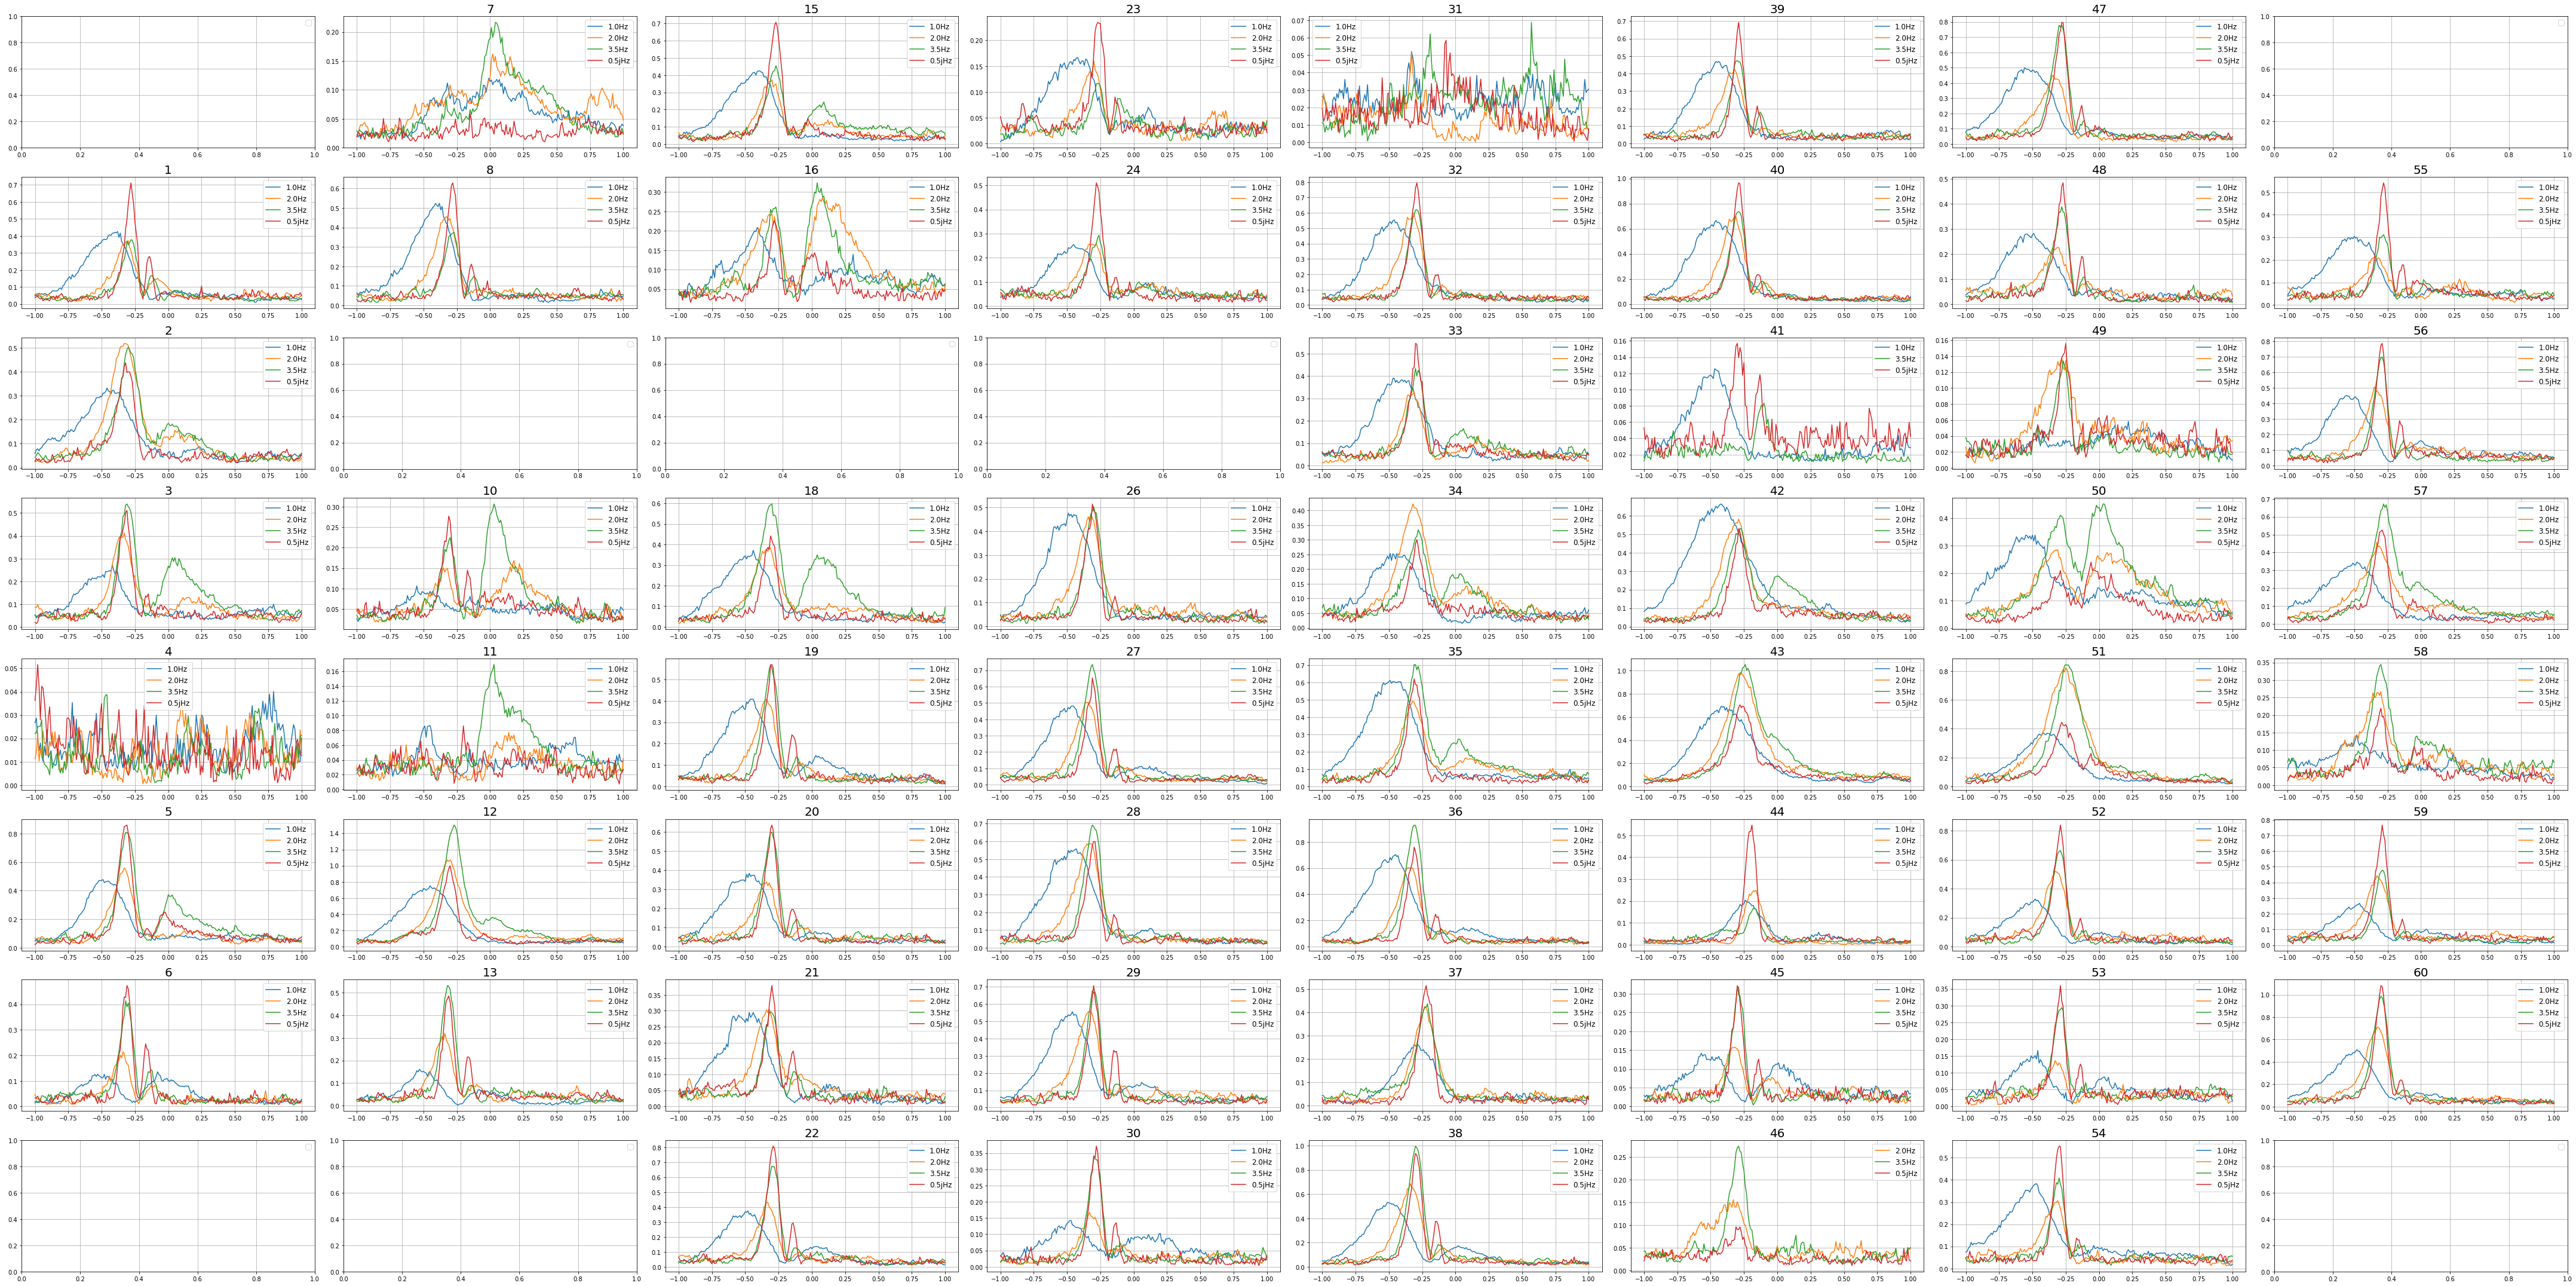

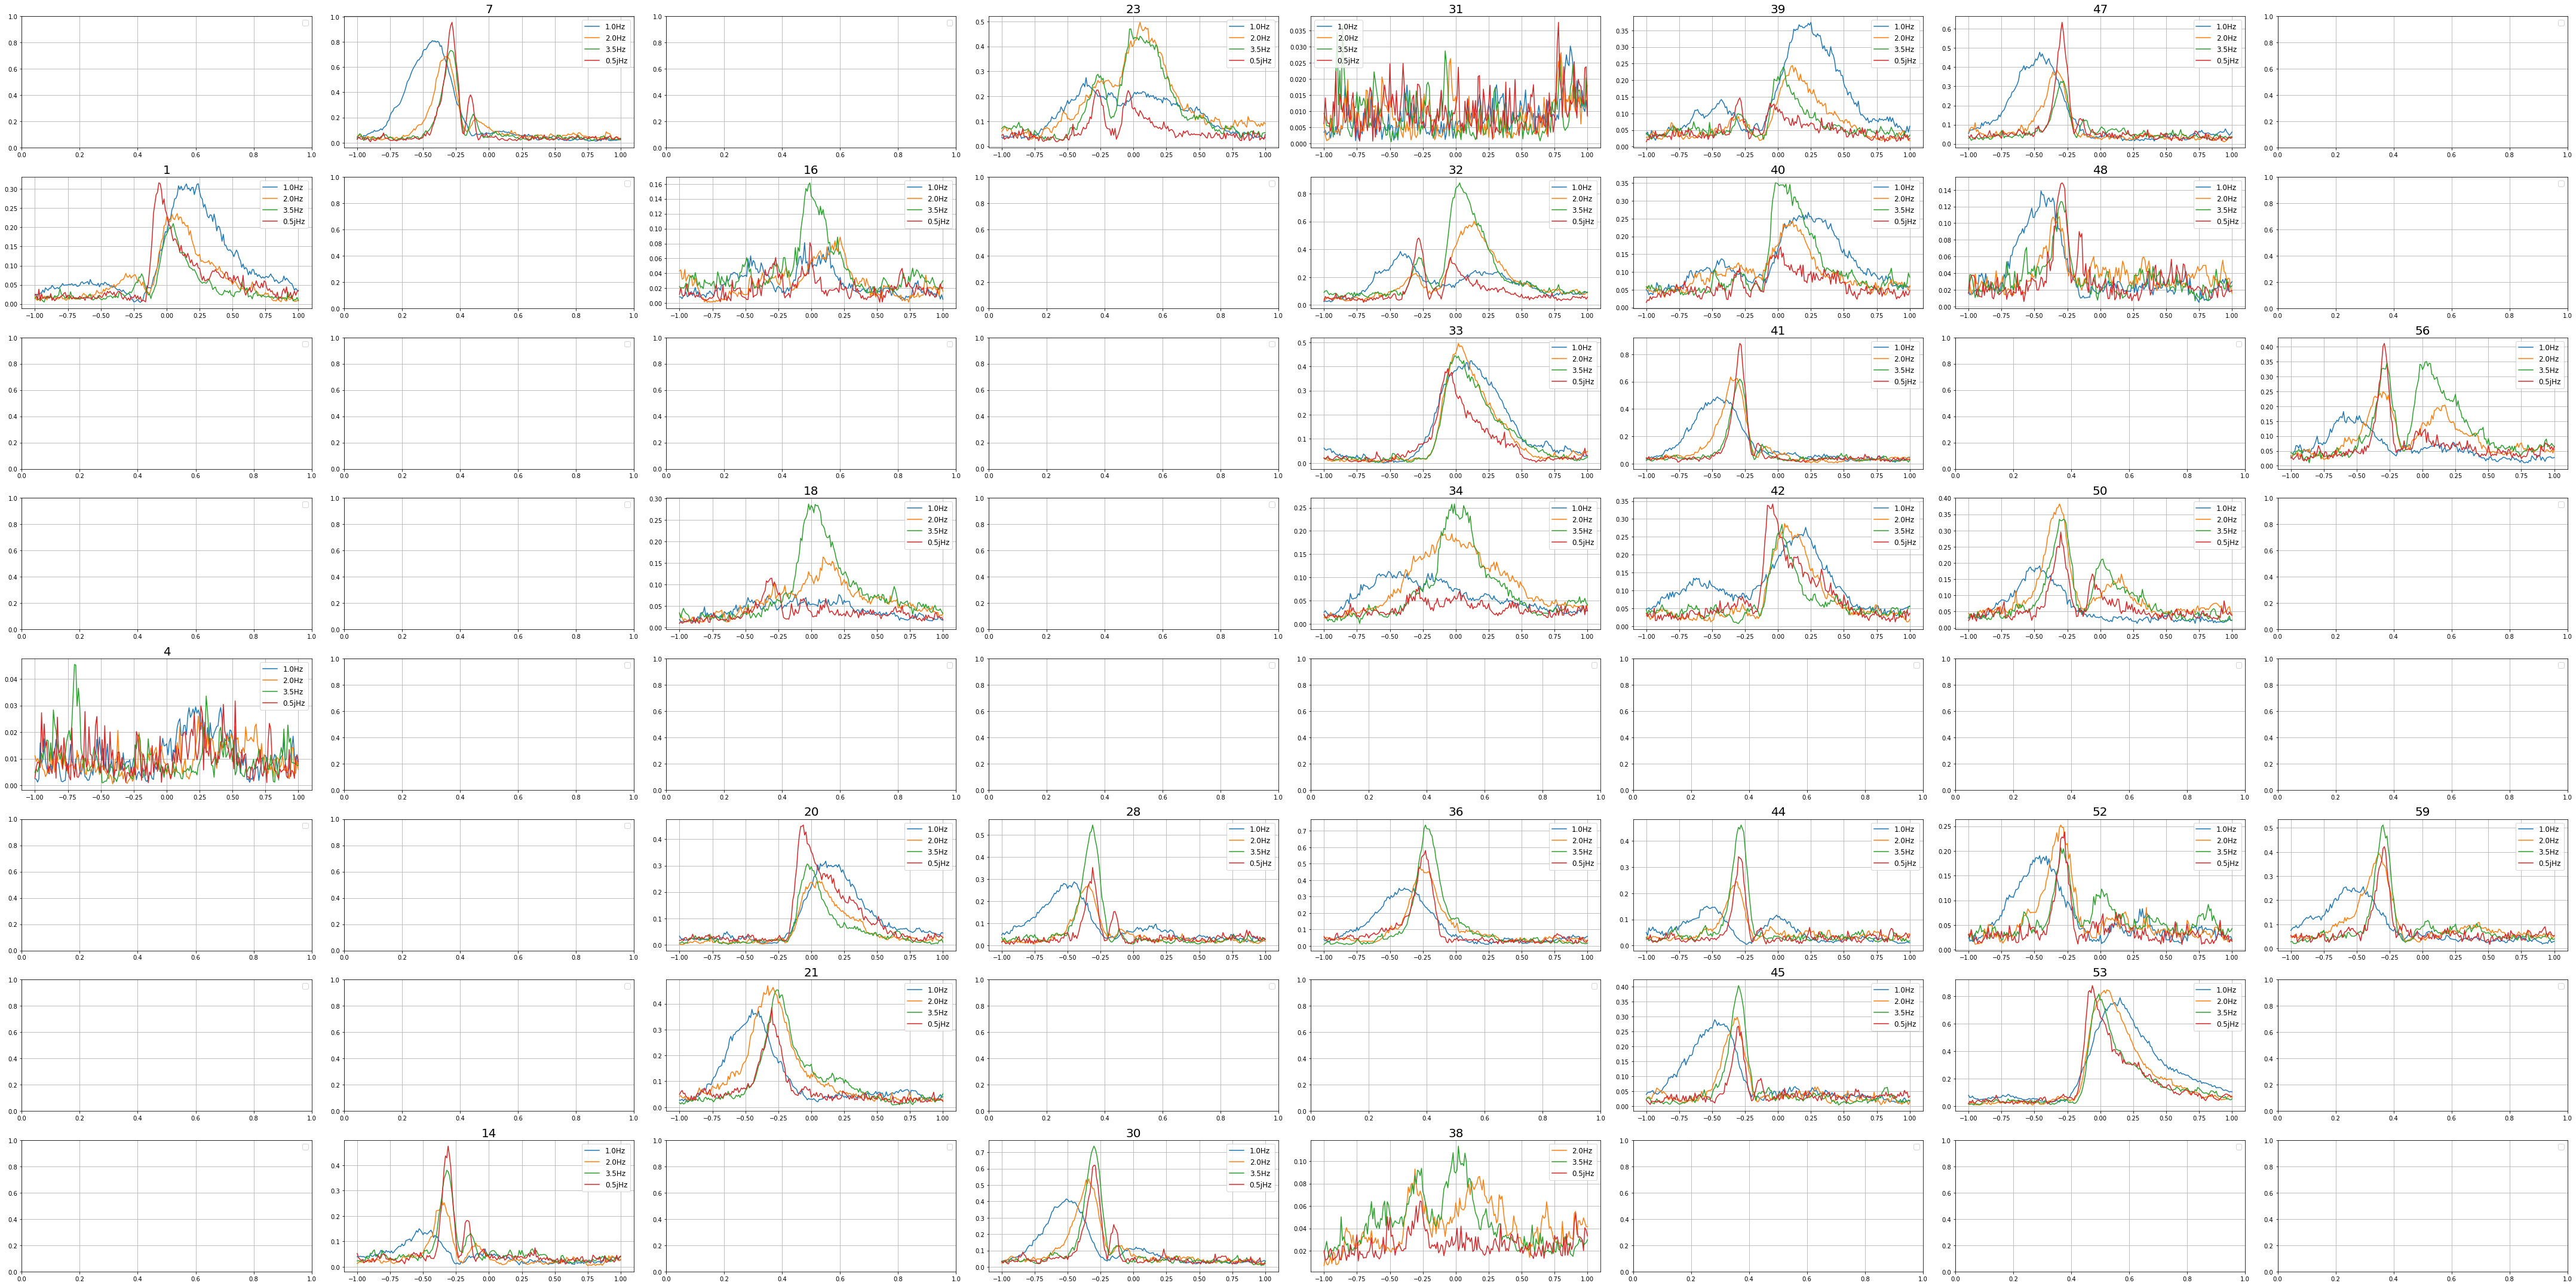

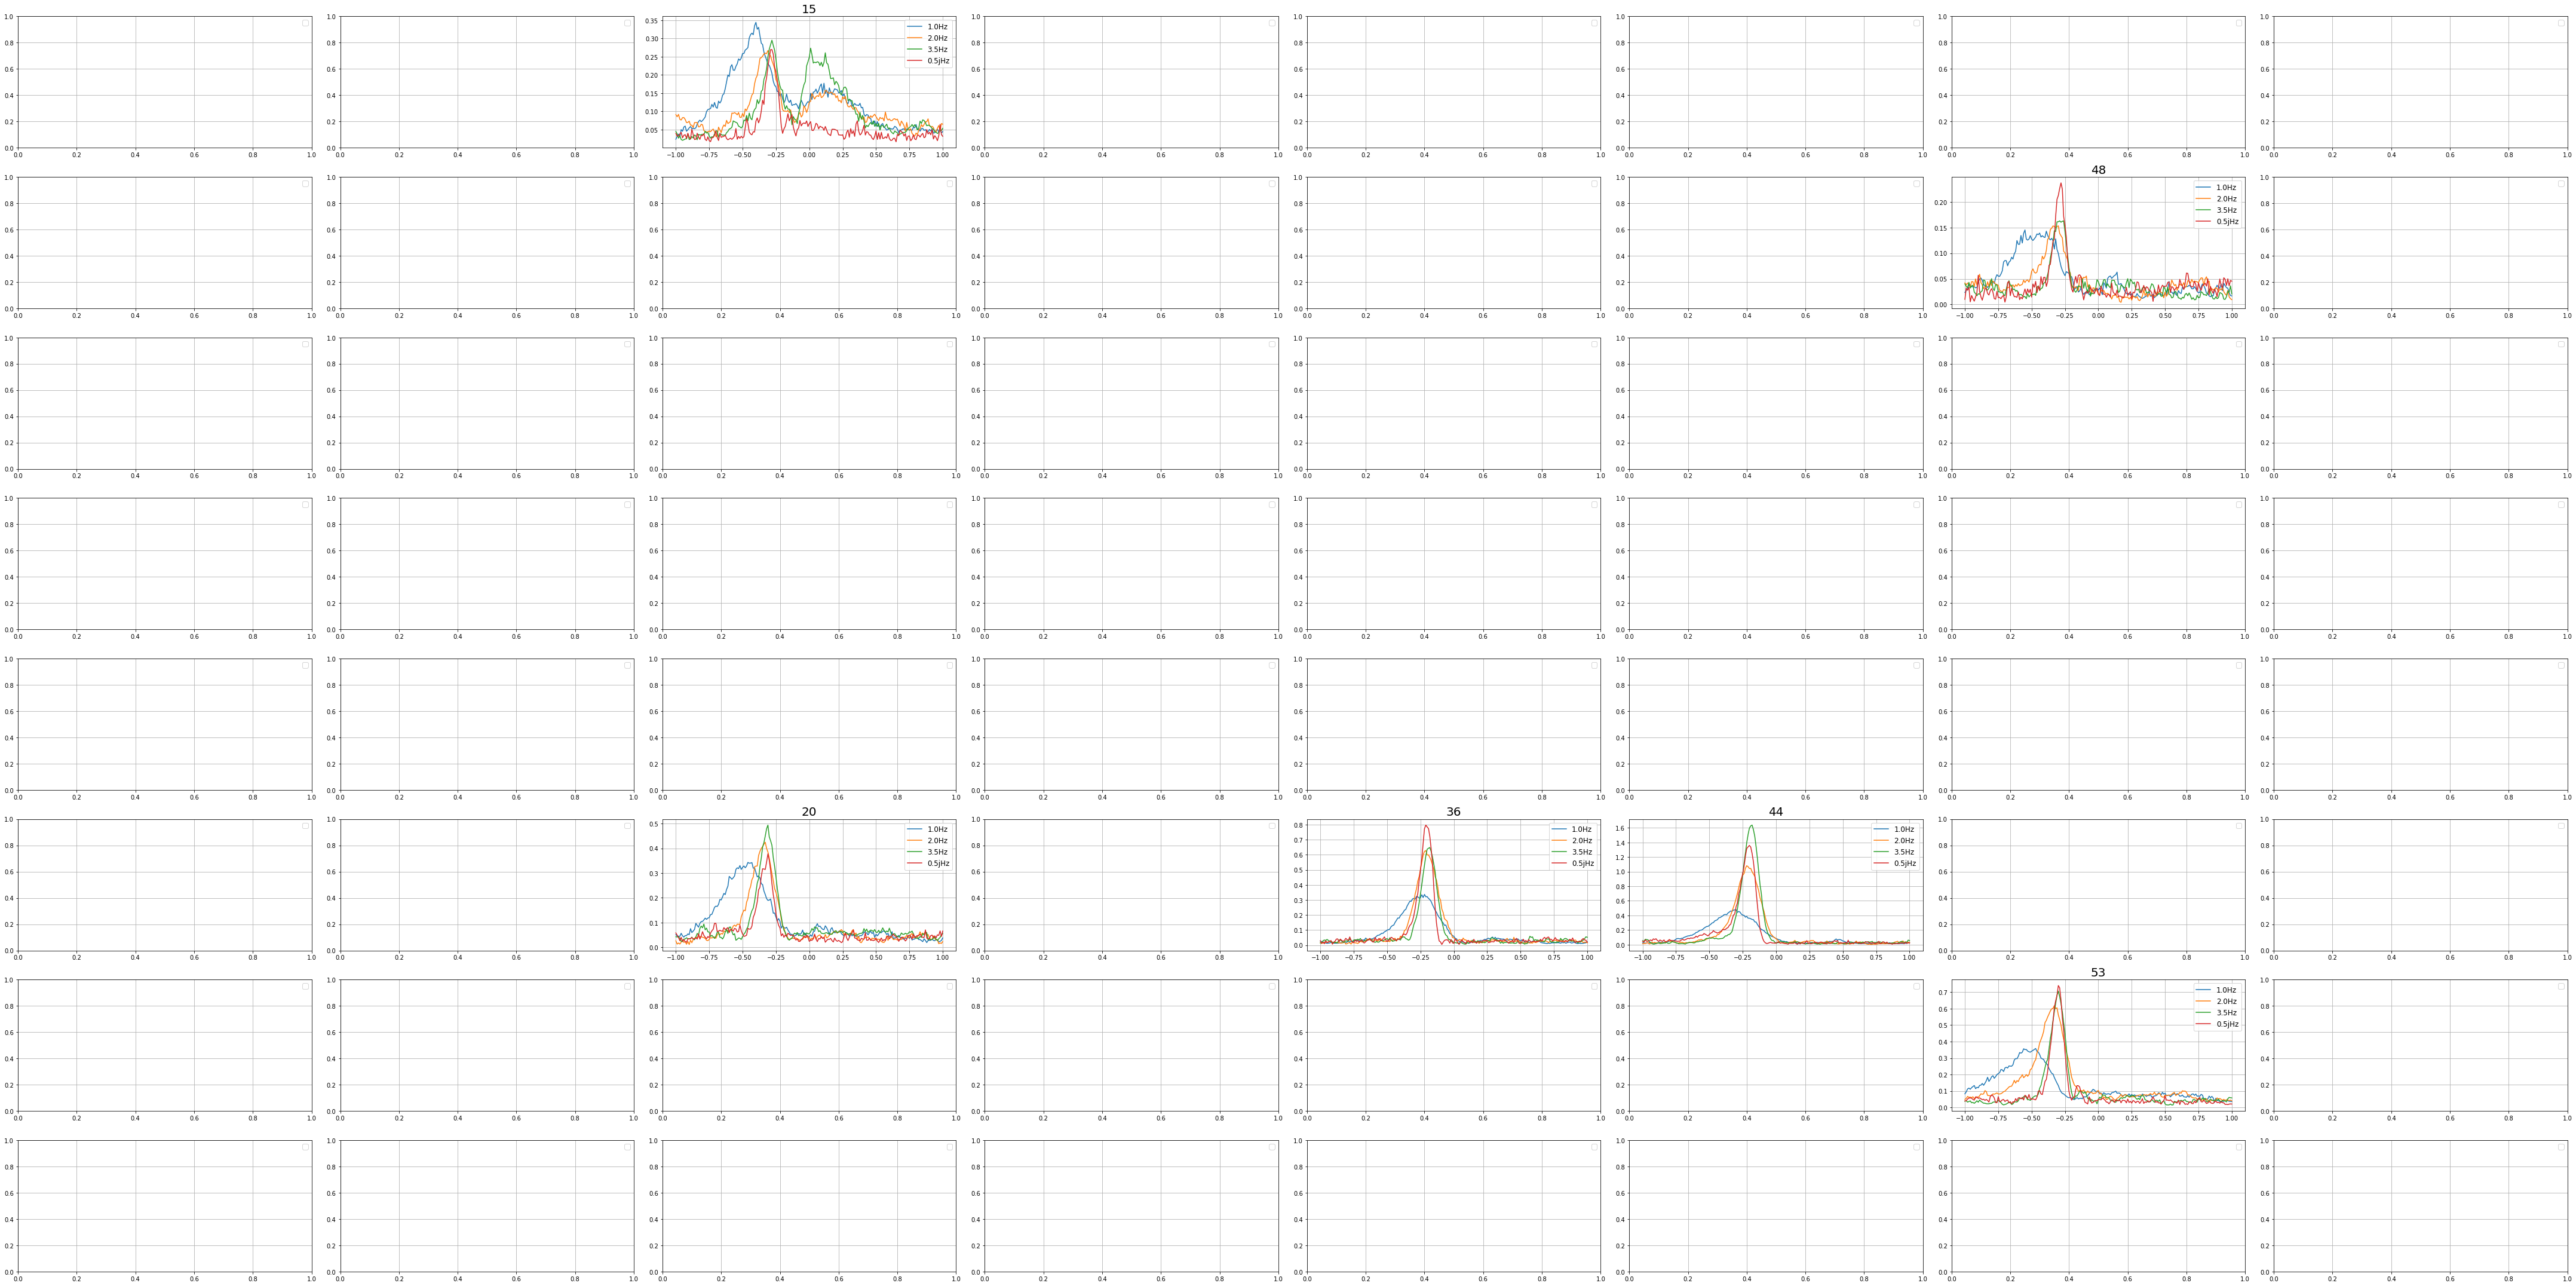

In [16]:
for unit in [1,2,3]:
    MIdFcfig, MIdFcax = plt.subplots(nrows=8, ncols=8)
    cmind = 0
    for Fc in [2, 4, 7, 1j]:
        if Fc == 1j:
            filename = 'MI_20200408_OU_original_tau=0p5_sort_unit'+str(unit)
        else:
            filename = 'MI_20200408_OU_cutoff='+str(Fc)+'_sort_unit'+str(unit)
        loadfiles = np.load(exp_folder+'MI\\'+filename+'.npz', allow_pickle=True)
        for k in loadfiles.files:
            vars()[k] = loadfiles[k][()]

        for cn in range(60):
            Information = Information_cell[cn]
            if Information == 0: continue
            MIdFcax[np.where(figmap == cn+1)][0].plot(timeshift,Information[('Beer','UIx')]+Information[('Beer','Red')]
                                                             , label=str(Fc/2)+'Hz', color = plt.cm.tab10(cmind))
            MIdFcax[np.where(figmap == cn+1)][0].set_title(str(cn+1), fontsize = 20)
    #         MIdFcax[np.where(figmap == cn+1)][0].set_xlabel(r'$\delta t$ (s)', fontsize = 16)
    #         MIdFcax[np.where(figmap == cn+1)][0].set_ylabel(r'Information (bit/s)', fontsize = 16)
        cmind += 1

    for ax1d in MIdFcax:
        for ax in ax1d:
            ax.legend(fontsize = 12)
            ax.grid()
    MIdFcfig.set_size_inches(60, 30)
    MIdFcfig.tight_layout()
    MIdFcfig.savefig(exp_folder+'MI\\Fig\\dFc_WF_OU_unit'+str(unit)+'.tif', bbox_inches = 'tight',pad_inches = 0.3)

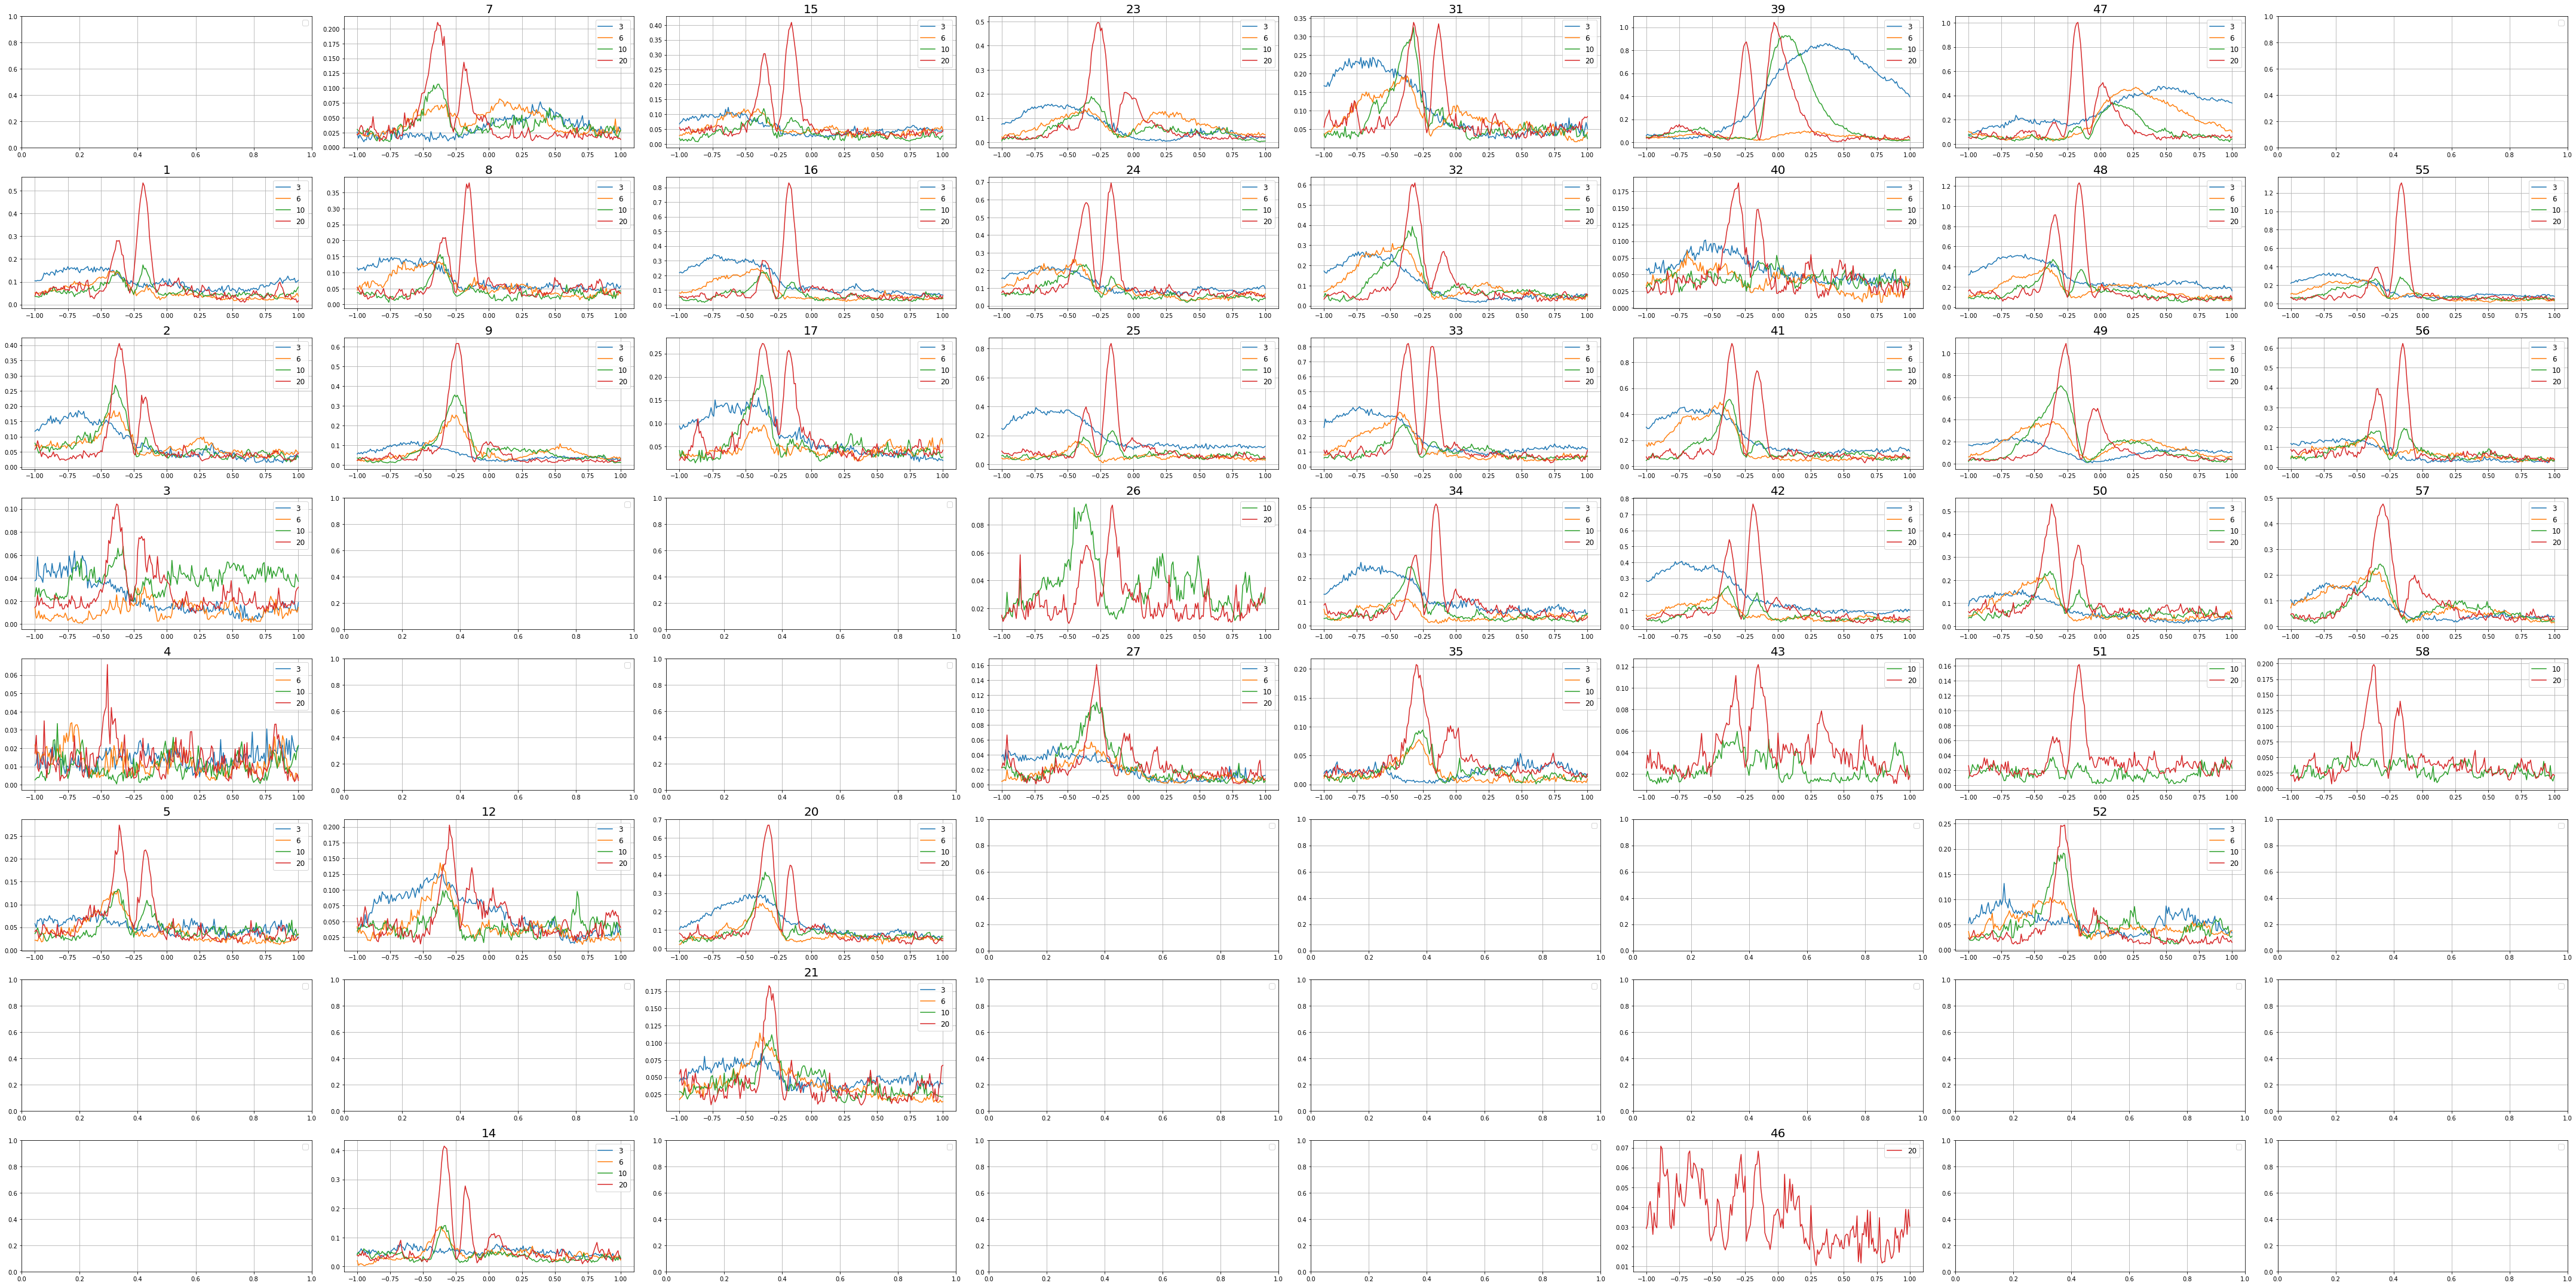

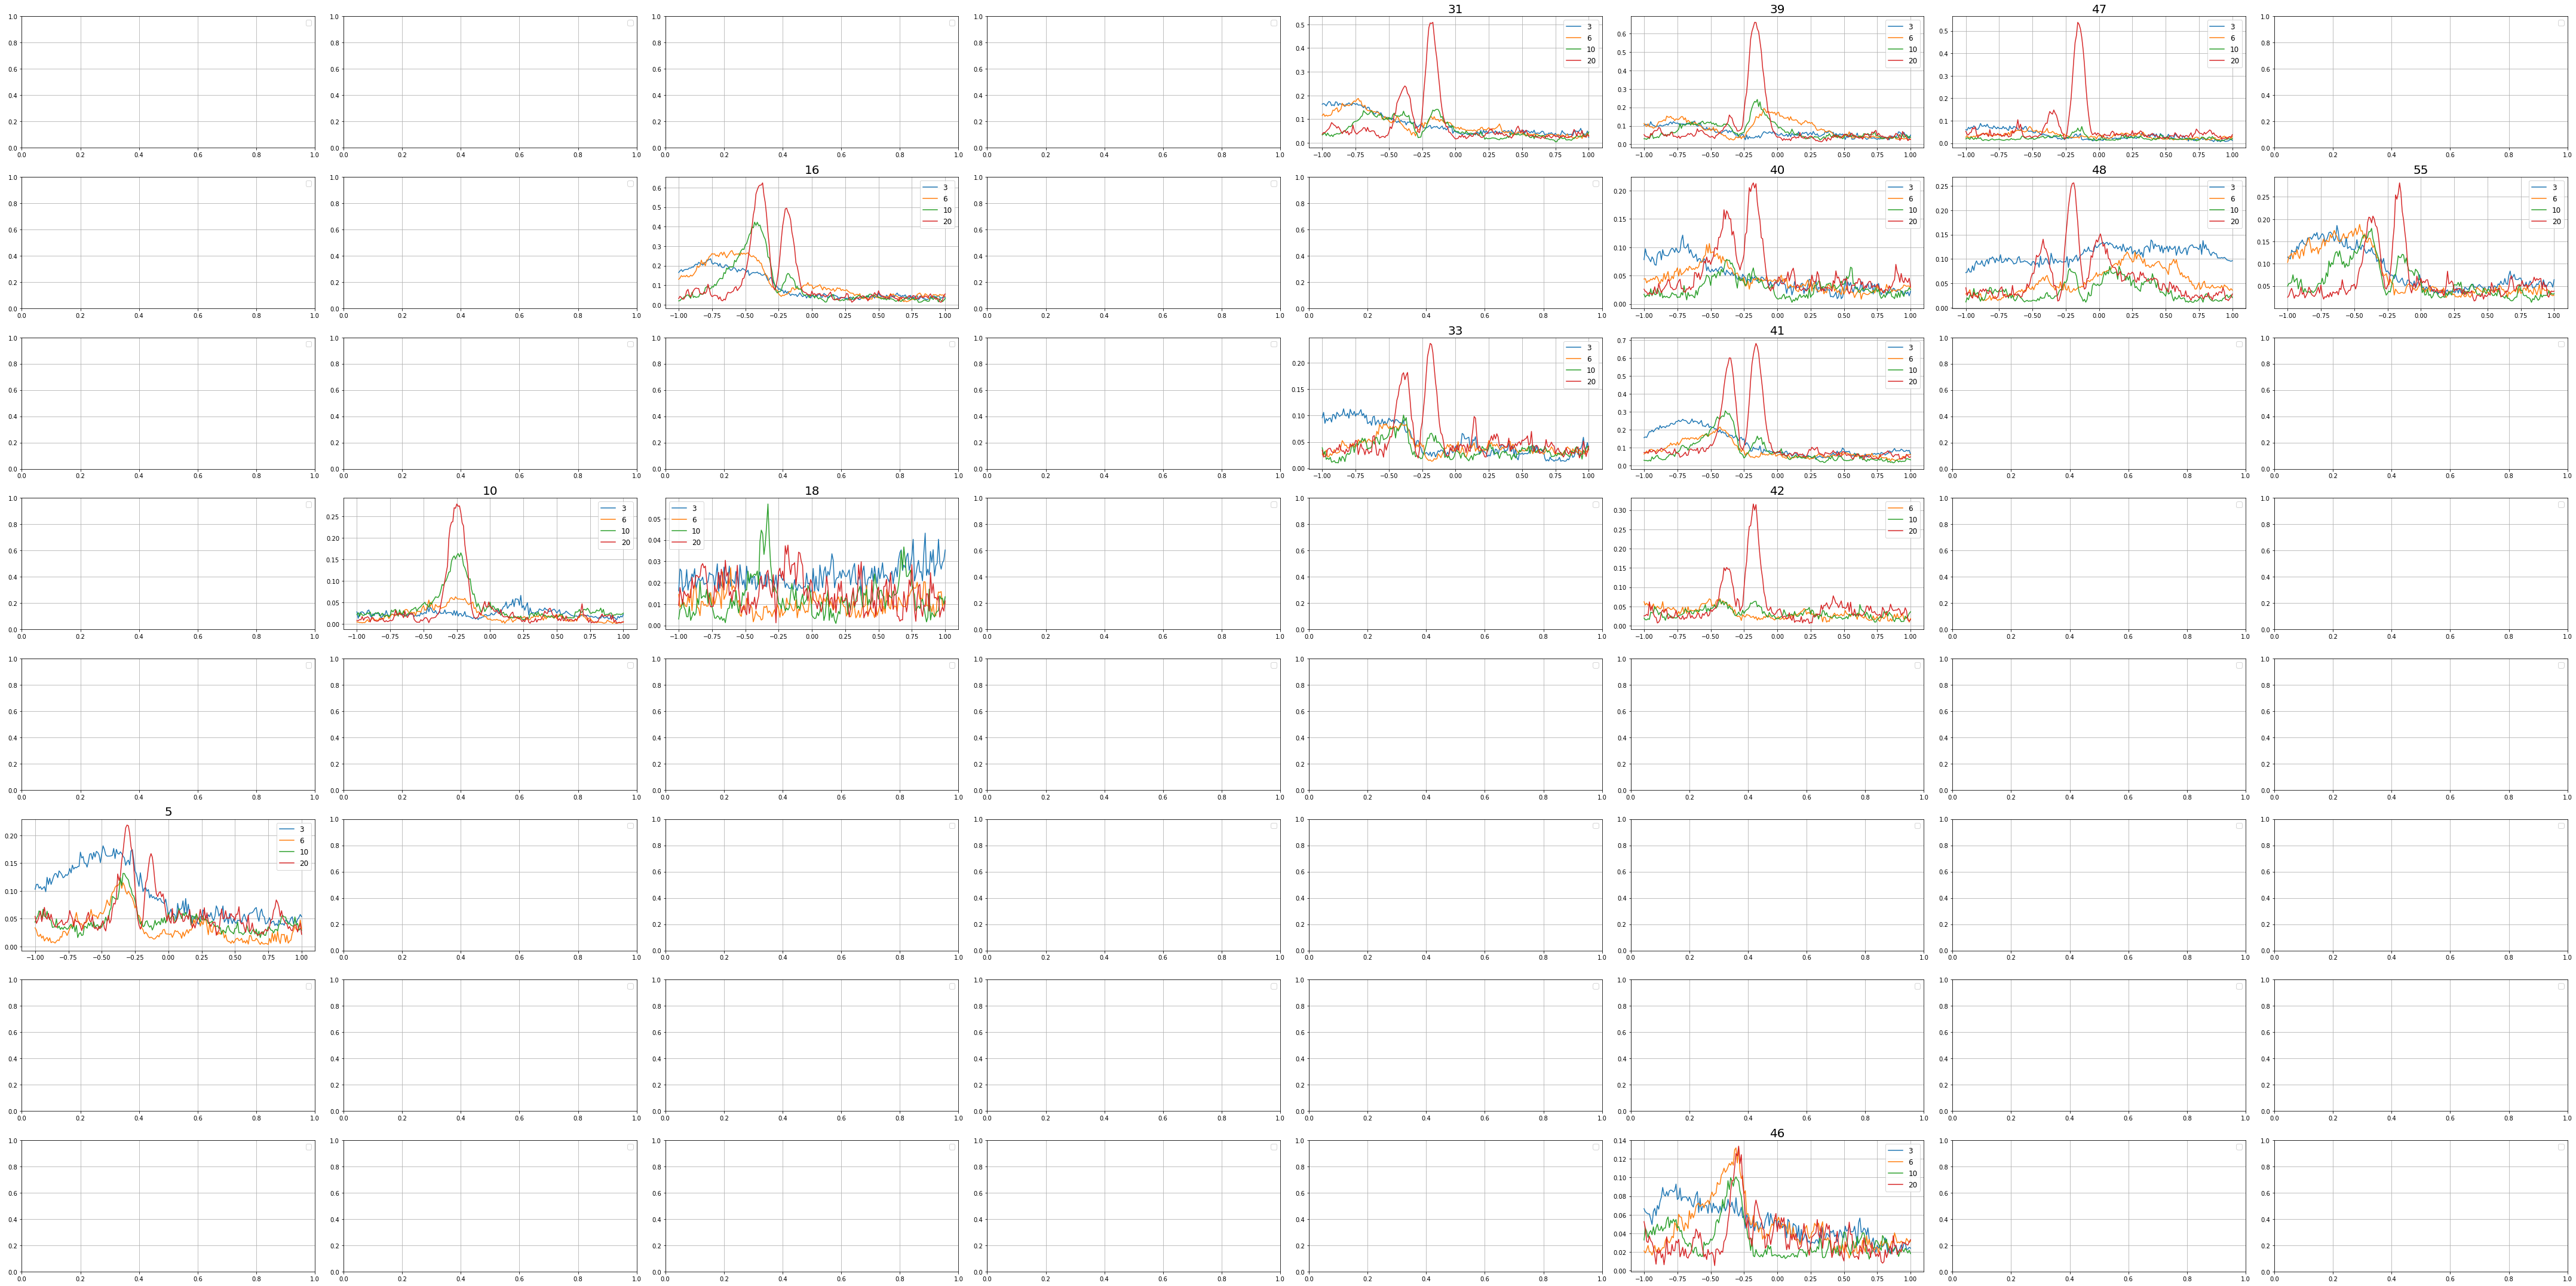

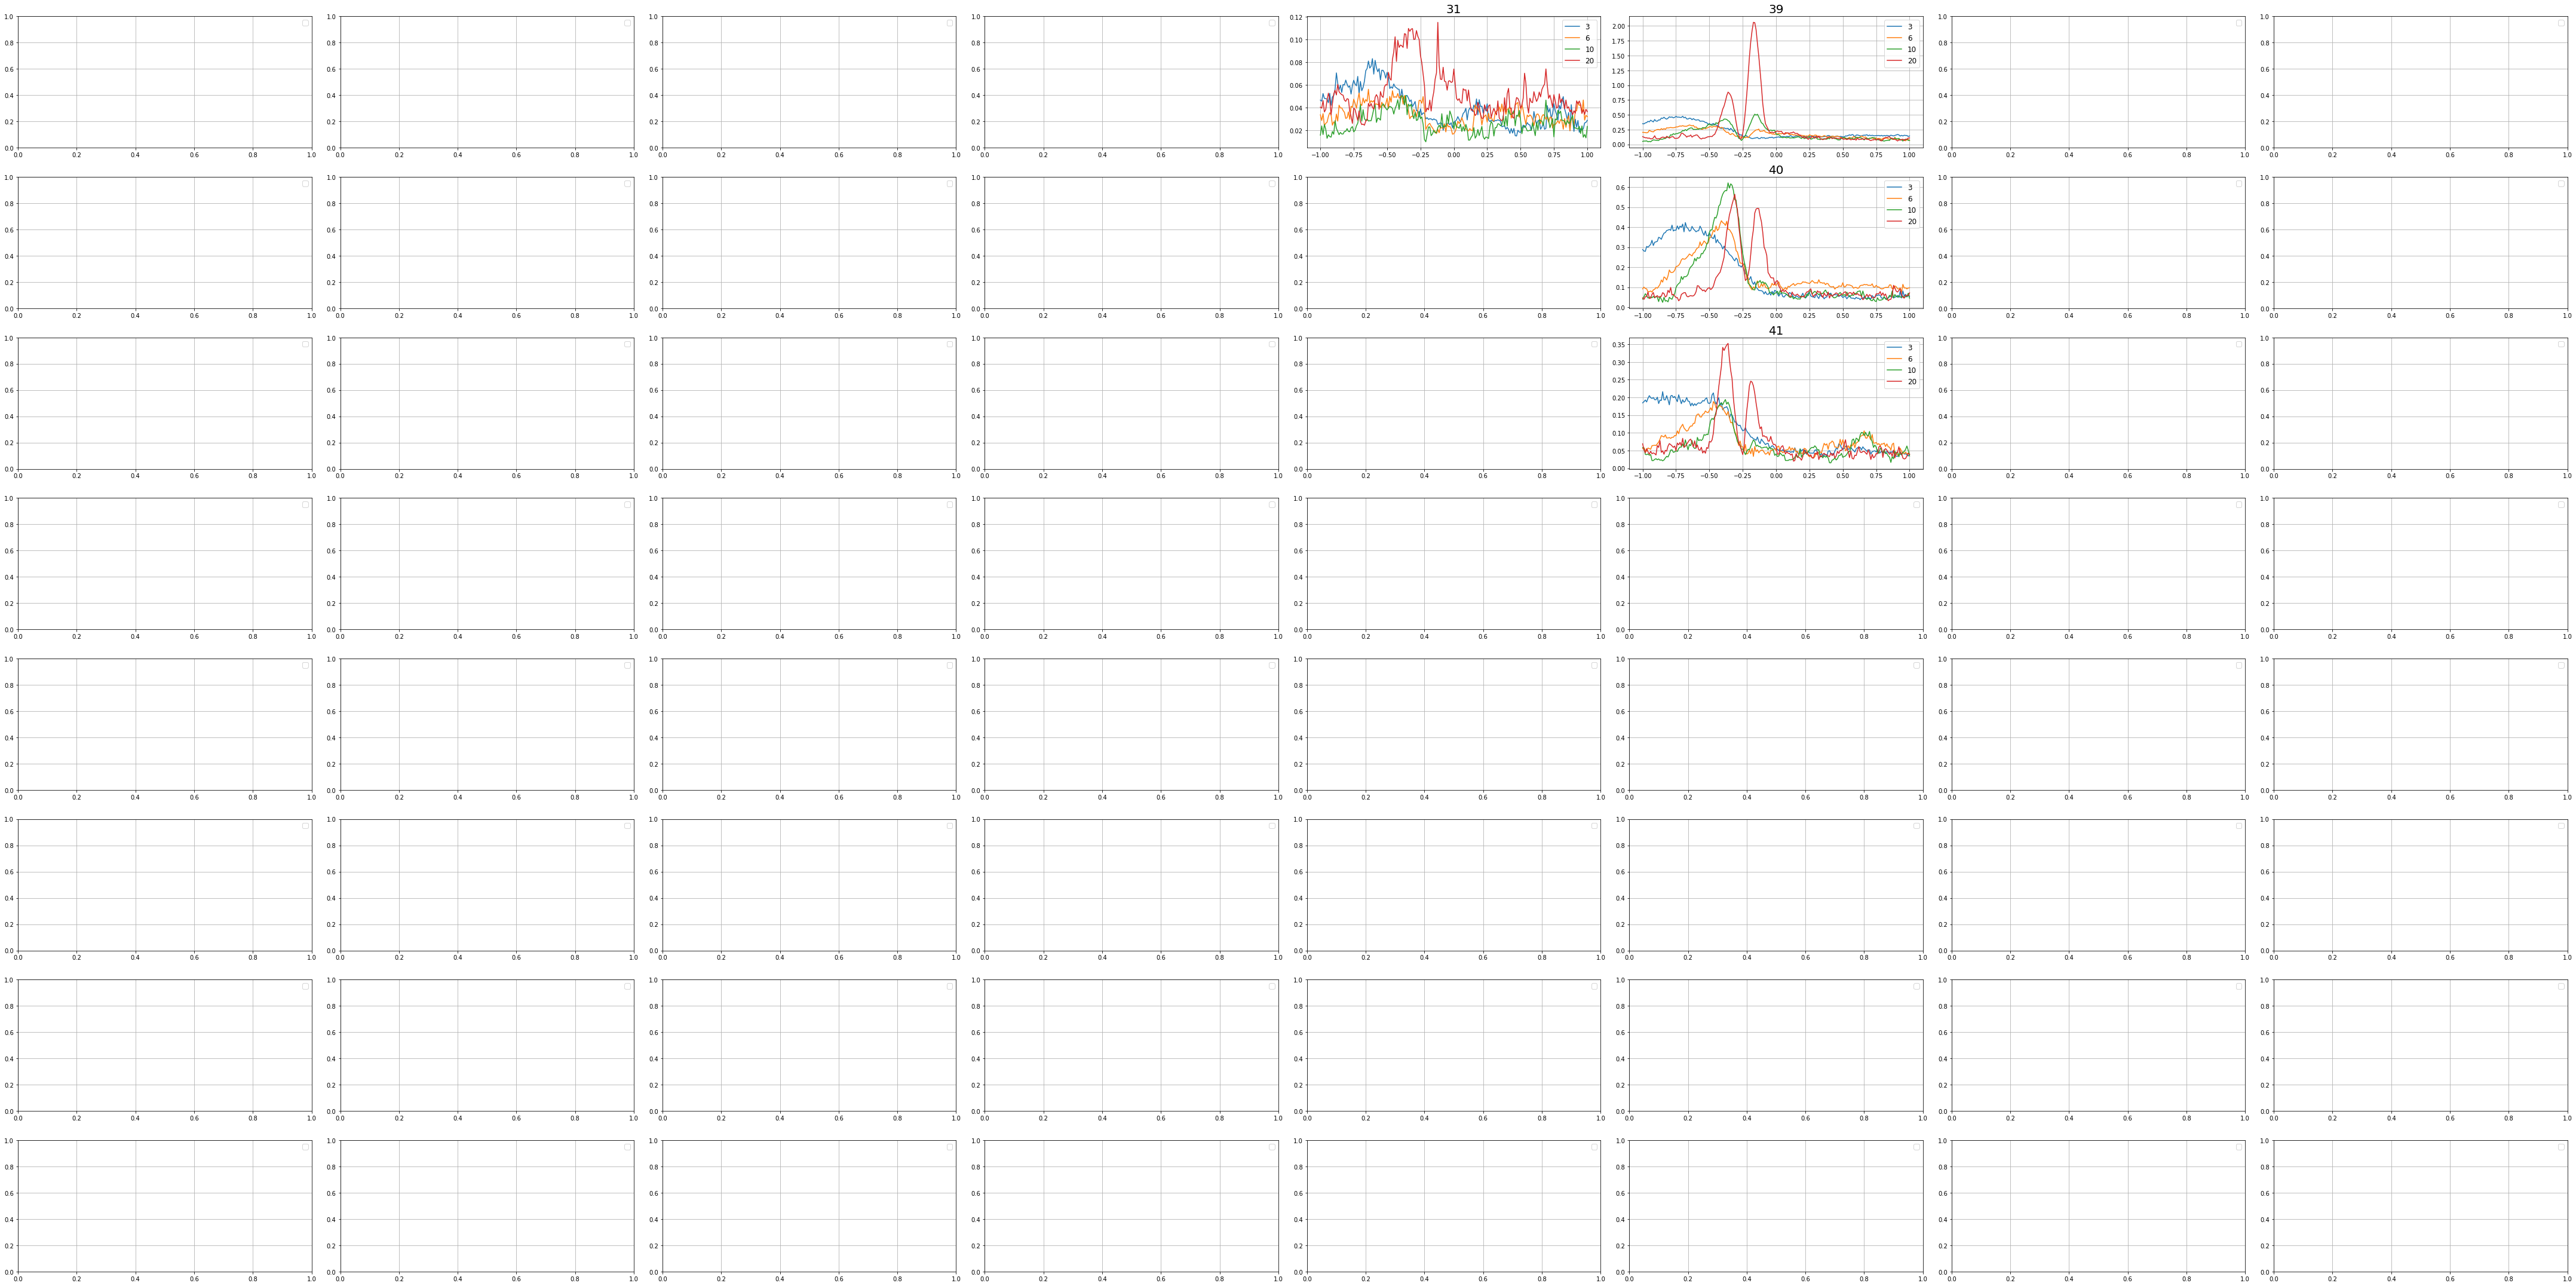

In [8]:
for unit in [1,2,3]:
    MIdFcfig, MIdFcax = plt.subplots(nrows=8, ncols=8)
    cmind = 0
    for G in [3, 6, 10, 20]:
        filename = 'HMM_G='+str(G)+'_19-Apr-2020_0_sort_unit'+str(unit)+'.mat'
        loadfiles = np.load(exp_folder+'MI\\'+filename+'.npz', allow_pickle=True)
        for k in loadfiles.files:
            vars()[k] = loadfiles[k][()]

        for cn in range(60):
            Information = Information_cell[cn]
            if Information == 0: continue
            MIdFcax[np.where(figmap == cn+1)][0].plot(timeshift,Information[('Beer','UIx')]+Information[('Beer','Red')]
                                                             , label=str(G), color = plt.cm.tab10(cmind))
            MIdFcax[np.where(figmap == cn+1)][0].set_title(str(cn+1), fontsize = 20)
    #         MIdFcax[np.where(figmap == cn+1)][0].set_xlabel(r'$\delta t$ (s)', fontsize = 16)
    #         MIdFcax[np.where(figmap == cn+1)][0].set_ylabel(r'Information (bit/s)', fontsize = 16)
        cmind += 1

    for ax1d in MIdFcax:
        for ax in ax1d:
            ax.legend(fontsize = 12)
            ax.grid()
    MIdFcfig.set_size_inches(60, 30)
    MIdFcfig.tight_layout()
    MIdFcfig.savefig(exp_folder+'MI\\Fig\\dFc_WF_HMM_unit'+str(unit)+'.tif', bbox_inches = 'tight',pad_inches = 0.3)